<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


#### Task 1

In [9]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [10]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


#### Task 2

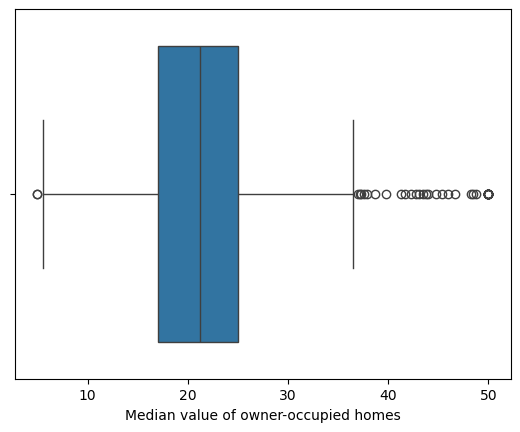

In [38]:
# BoxPlot
sns.boxplot(x = boston_df.MEDV)
pyplot.xlabel('Median value of owner-occupied homes')
pyplot.show()

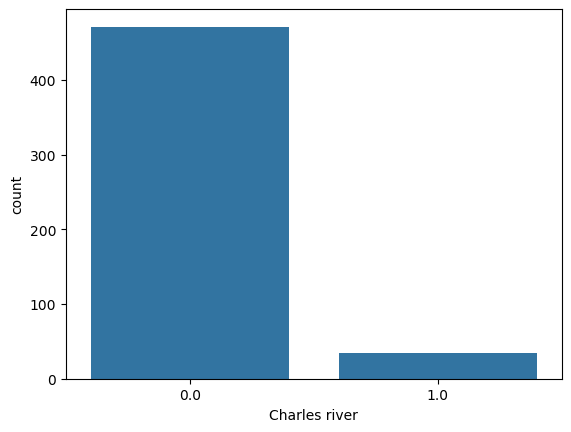

In [39]:
# BarPlot
sns.countplot(x = boston_df.CHAS)
pyplot.xlabel('Charles river')
pyplot.show()

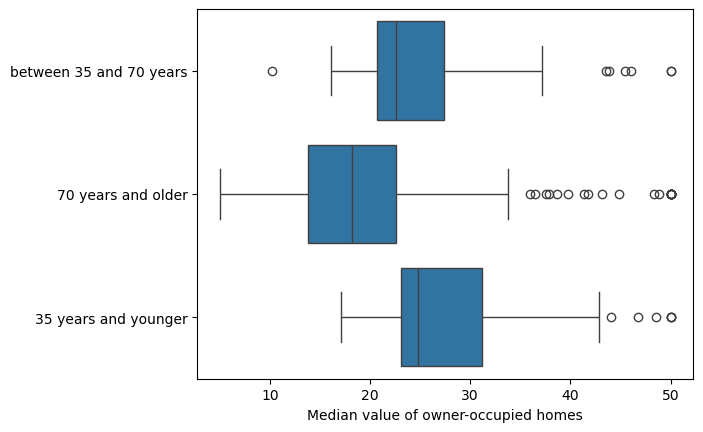

In [37]:
# Discretizing the age variable
boston_df['AGE_GROUPS'] = boston_df['AGE'].apply(
    lambda x : ('35 years and younger' if x <= 35 else
                'between 35 and 70 years' if x < 70 else
                 '70 years and older')
)

# BoxPlot
sns.boxplot(x = boston_df.MEDV, y = boston_df.AGE_GROUPS)
pyplot.xlabel('Median value of owner-occupied homes')
pyplot.ylabel('')
pyplot.show()

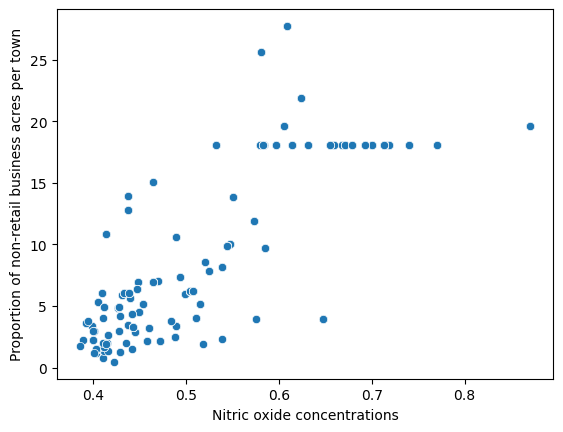

In [42]:
# ScatterPlot
sns.scatterplot(x = boston_df.NOX, y = boston_df.INDUS)
pyplot.xlabel('Nitric oxide concentrations')
pyplot.ylabel('Proportion of non-retail business acres per town')
pyplot.show()
# We can see a positive relationship between the two variables. 
# In general, when NOX increases, INDUS also increases and viceverse.

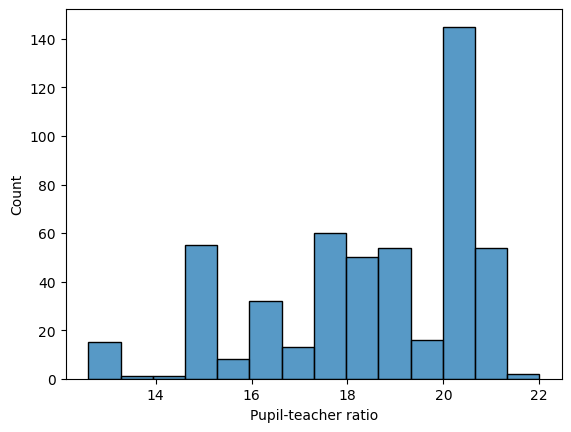

In [44]:
# Histrogram
sns.histplot(x = boston_df.PTRATIO)
pyplot.xlabel('Pupil-teacher ratio')
pyplot.show()

#### Task 3

##### Is there a significant difference in median value of houses bounded by the Charles river or not?

Ho : u1 = u2  (No diferences in median value of houses bounded by the Charles river or not )  
H1 : u1 != u2 (Diferences in median value of houses bounded by the Charles river or not)  
alfa = 0.05

In [59]:
df_medv_chas0 = boston_df[boston_df.CHAS == 0].MEDV
df_medv_chas1 = boston_df[boston_df.CHAS == 1].MEDV

scipy.stats.ttest_ind(df_medv_chas0, df_medv_chas1)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Result: p < 0.05  
Conclusion: We reject the null hypothesis, there is differences in the median value of houses when they are bounded by the river.

##### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? 

Ho: u1 = u2 = u3, the three means are equal (age groups)  
H1: At least, one is different   
alfa = 0.05

In [62]:
# Age groups
df_less_35 = boston_df[boston_df.AGE_GROUPS == '35 years and younger'].MEDV
df_35_to_70 = boston_df[boston_df.AGE_GROUPS == 'between 35 and 70 years'].MEDV
df_more_70 = boston_df[boston_df.AGE_GROUPS == '70 years and older'].MEDV

In [60]:
# Prueba de varianza
scipy.stats.levene(df_less_35, df_35_to_70, df_more_70, center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

We cannot say that the three populations have different variances (p>0.05), we proceed with the ANOVA

In [63]:
# ANOVA
scipy.stats.f_oneway(df_less_35, df_35_to_70, df_more_70)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

Result: p < 0.05
Conclusion: We reject the null hypothesis. At least one of the mean values of any population is different to others.

##### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

Ho: Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town  
H1: Nitric oxide concentrations is correlated with proportion of non-retail business acres per town  
alfa = 0.05

In [57]:
scipy.stats.pearsonr(boston_df.NOX, boston_df.INDUS)

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Result: p < 0.05  
Conclusion: We reject the null hypothesis, we can say there is a correlation between the two variables, like we saw in the scatterplot above.

##### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? 

Ho: There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes  
H1: There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes  
alfa = 0.05

In [58]:
# Define variables
X = boston_df.DIS # independent
y = boston_df.MEDV # dependent

# Add intercept
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
pred = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 01 May 2024   Prob (F-statistic):           1.21e-08
Time:                        13:15:01   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Result: p < 0.05  
Conclusion: There is evidence of correlation between weighted distance to the five Boston employment centres and the median value of owner occupied homes